In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')
import statsmodels.formula.api as sm 
import statsmodels.api as sm2

%matplotlib inline

In [3]:
housing = pd.read_csv('Ames_Iowa_Housing_Prices_Dataset.csv')

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2454 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

- 2019 houses in the dataset, majority of columns are fairly complete
- Many of the features describe physical attributes of each home, for the purpose of statistical inference it might be ok to ignore these house-specific features and look at broader things like neighbourhood, overall condition, timeseries aspects
- Sales Price is the dependent variable here, ultimately the target of any predictive model we make

In [5]:
housing['SalePrice'].describe()

count      2919.000000
mean     180052.854648
std       57381.565721
min       34900.000000
25%      154795.084150
50%      176734.841500
75%      191895.744150
max      755000.000000
Name: SalePrice, dtype: float64

- Mean is higher than median for sales price, indicating slight postive skew with outliers

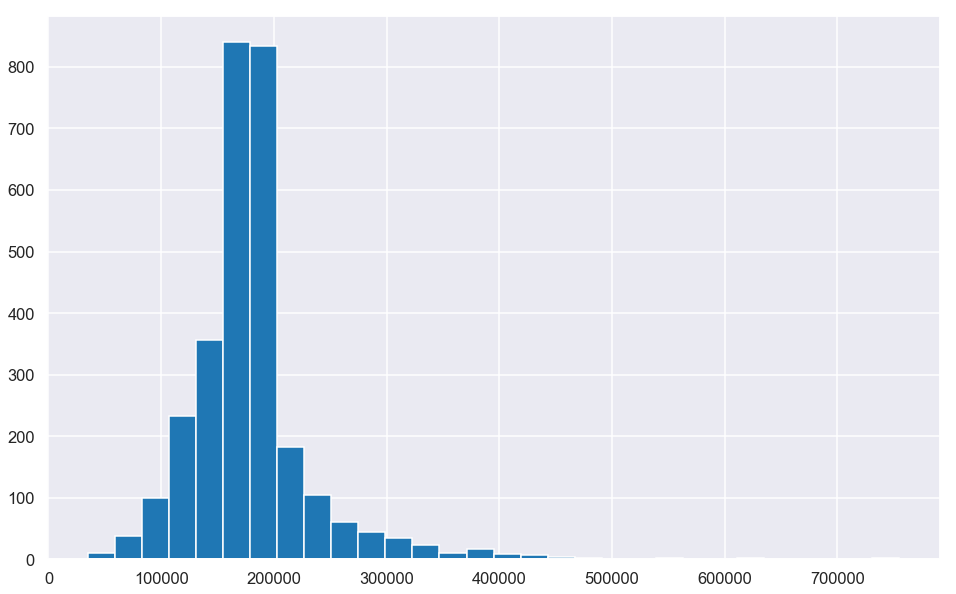

In [6]:
plt.figure(figsize=(16,10))

housing['SalePrice'].hist(bins=30)

- Histogram indicates right skewed distribution

## Timeseries Analysis

Looking at Date Sold, Date Built

- When were the houses in neighbourhoods built? Perhaps this could uncover some of the history of Ames' development
- Quality of house when sold vs original time it was built
- Age of a house before it's sold
- When in the year are most houses sold? Any trends that could be useful to realtors?
- Gentrifying? What neighbourhoods are on the rise?

### Date Sold

In [7]:
housing[['MoSold', 'YrSold']].head()

,MoSold,YrSold
0,2,2008
1,5,2007
2,9,2008
3,2,2006
4,12,2008


In [8]:
import datetime

In [9]:
def date_sold(row):
    """combines MoSold and YrSold into a single date attribute"""
    y = row.YrSold
    m = row.MoSold
    datetime_obj = datetime.datetime.strptime("{} {}".format(m,y), "%m %Y")
    return datetime_obj

In [10]:
date_sold(housing.iloc[1])

datetime.datetime(2007, 5, 1, 0, 0)

In [11]:
housing['DateSold'] = housing.apply(date_sold, axis=1)

In [12]:
housing.DateSold.head()

0   2008-02-01
1   2007-05-01
2   2008-09-01
3   2006-02-01
4   2008-12-01
Name: DateSold, dtype: datetime64[ns]

In [13]:
housing_ts = housing.set_index(pd.DatetimeIndex(housing.DateSold))
housing_ts.reindex()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DateSold
DateSold,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0000,2008-02-01
2007-05-01,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0000,2007-05-01
2008-09-01,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0000,2008-09-01
2006-02-01,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0000,2006-02-01
2008-12-01,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0000,2008-12-01
2009-10-01,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0000,2009-10-01
2007-08-01,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0000,2007-08-01
2009-11-01,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0000,2009-11-01
2008-04-01,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0000,2008-04-01


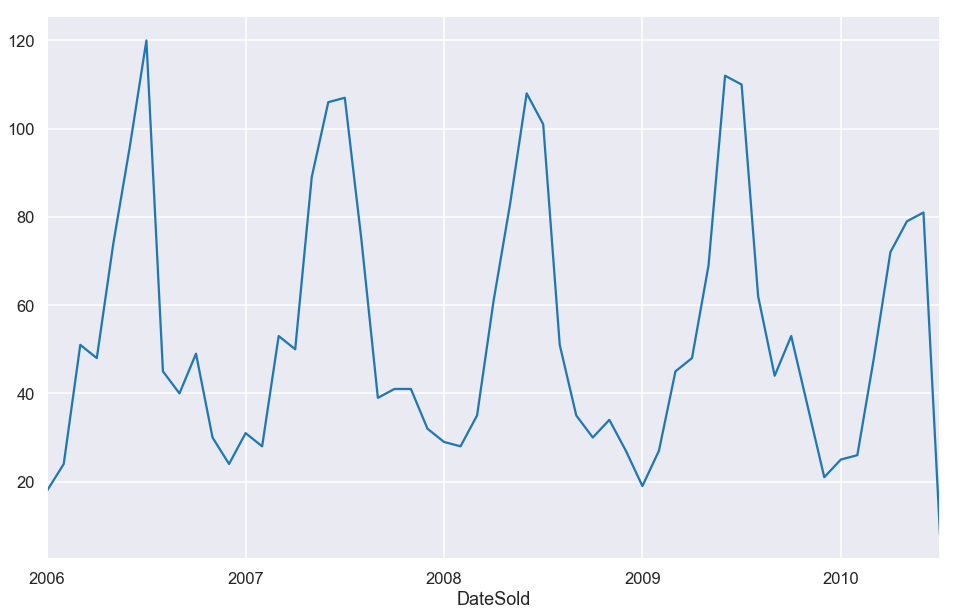

In [14]:
plt.figure(figsize=(16,10))

housing_ts.resample('M').Id.count().plot()

- Very clear indication of seasonality when it comes to housing sales, most houses are sold during the middle of the year

In [15]:
housing_ts.groupby(['MoSold']).count().Id.sort_values(ascending=False)

MoSold
6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: Id, dtype: int64

- May, June, July (Months 5,6,7) are when most houses get sold
- The beginning/end of each year are when the least houses are sold

### Year Built, House Age

- Which neighbourhoods grew over time? (houses built)

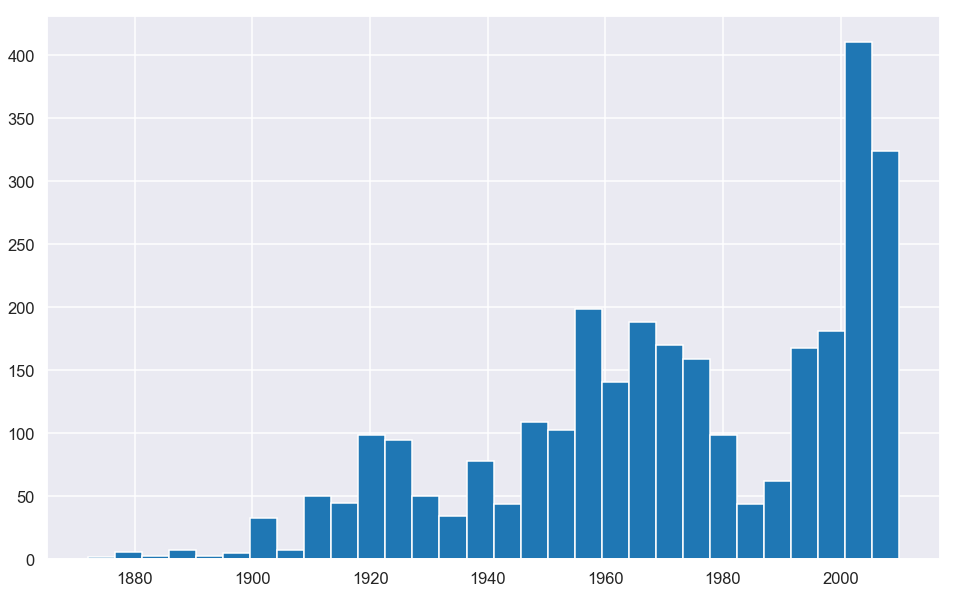

In [16]:
plt.figure(figsize=(16,10))

housing_ts['YearBuilt'].hist(bins=30)

- Distribution of houses built is multimodal, peaks in the 1960s-80s and 1990s-2000s
- What caused these spurs of development over time?
- Periods of economic growth/stagnation in Ames?

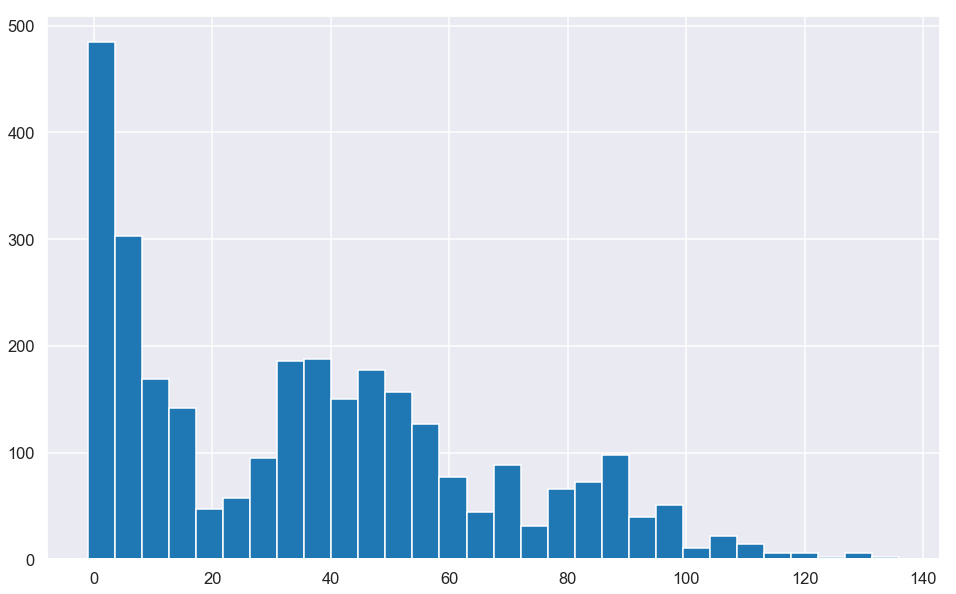

In [17]:
housing_ts['HouseAge'] = housing_ts.YrSold - housing_ts.YearBuilt

plt.figure(figsize=(16,10))
housing_ts.HouseAge.hist(bins=30)

- Somewhat exponential distribution of housing ages before they're sold
- Most of the houses sold are very new, but there's a good portion that get sold after they're 20-60 years old
- Could do statistical inference here to find parameters for exponential distribution of housing ages, using MCMC/PyMC3 model
- Is there a correlation b/w house age and house condition at time of sale?
- Look into year of Remodeling too

Text(0.5, 0, 'Age in Years at Time of Sale')

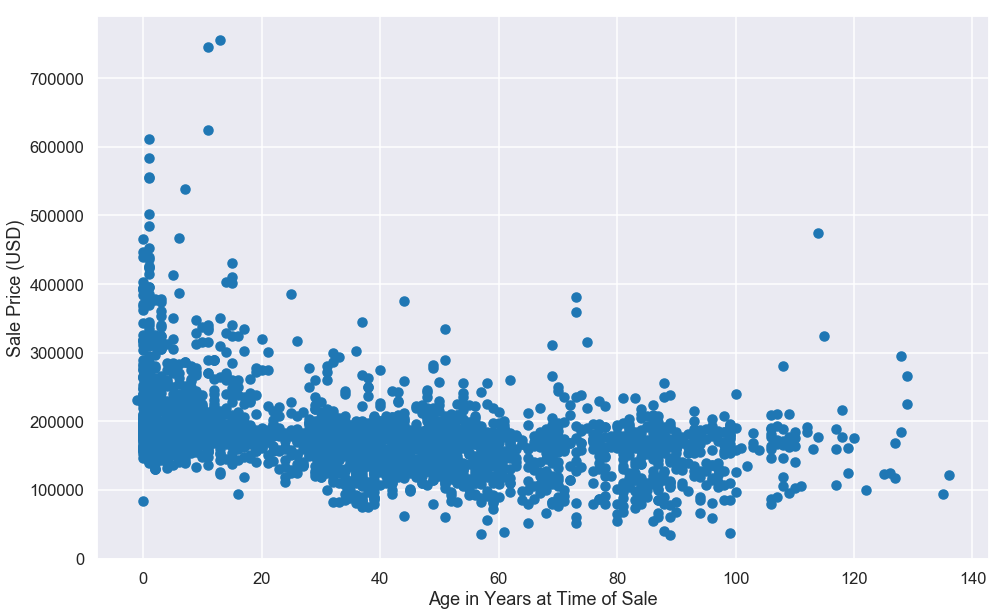

In [18]:
plt.figure(figsize=(16,10))

plt.scatter(housing_ts.HouseAge, housing_ts.SalePrice)
plt.ylabel("Sale Price (USD)")
plt.xlabel("Age in Years at Time of Sale")

In [19]:
housing_ts[['HouseAge', 'SalePrice']].corr()

,HouseAge,SalePrice
HouseAge,1.000000,-0.363226
SalePrice,-0.363226,1.000000


- Moderate negative relationship between Sale Price and age of house at time of sale

### The growth of different neighbourhoods over time

- Lets see the rates at which houses were built in each of Ames' neighbourhoods

In [20]:
housing_ts.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

Change neighborhood abbreviations to actual names

In [21]:
neighbourhood_names = {
    "Blmngtn": "Bloomington Heights",
    "Blueste": "Bluestem",
    "BrDale": "Briardale",
    "BrkSide": "Brookside",
    "ClearCr": "Clear Creek",
    "CollgCr": "College Creek",
    "Crawfor": "Crawford",
    "Edwards": "Edwards",
    "Gilbert": "Gilbert",
    "IDOTRR": "Iowa DOT and Rail Road",
    "MeadowV": "Meadow Village",
    "Mitchel": "Mitchell",
    "NAmes": "North Ames",
    "NoRidge": "Northridge",
    "NPkVill": "Northpark Villa",
    "NridgHt": "Northridge Heights",
    "NWAmes": "Northwest Ames",
    "OldTown": "Old Town",
    "SWISU": "South & West of Iowa State University",
    "Sawyer": "Sawyer",
    "SawyerW": "Sawyer West",
    "Somerst": "Somerset",
    "StoneBr": "Stone Brook",
    "Timber": "Timberland",
    "Veenker": "Veenker"
}

housing_ts.Neighborhood = housing_ts.Neighborhood.apply(lambda x: neighbourhood_names[x])

- First let's see the size of different neighbourhoods

Text(0.5, 0, '# of Houses')

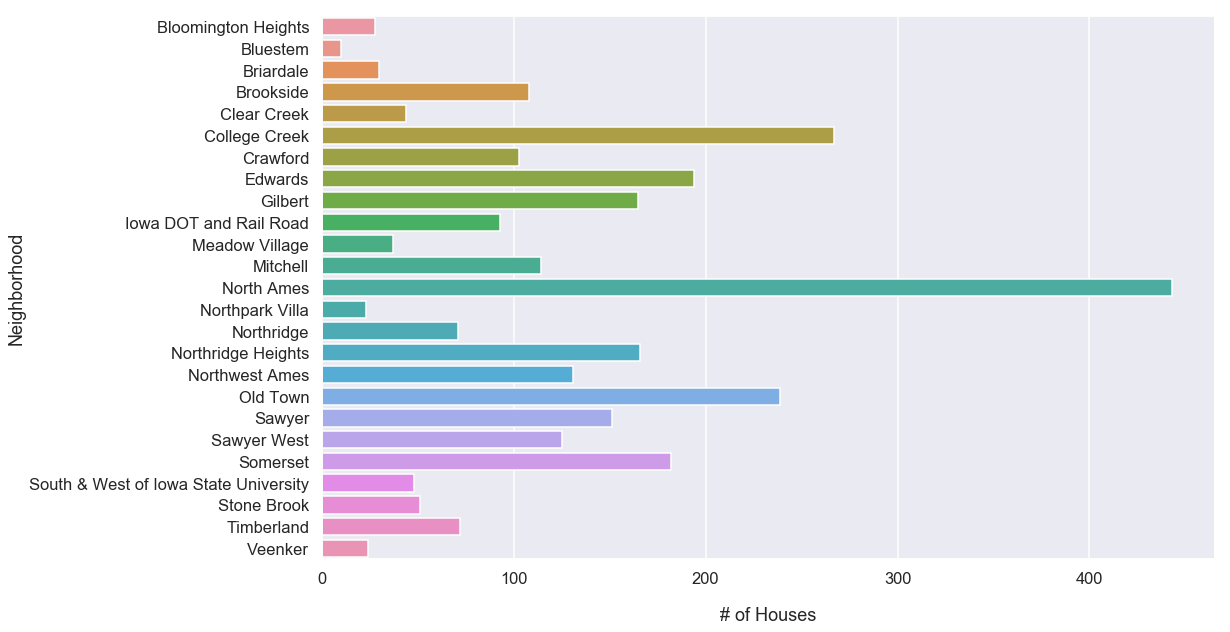

In [22]:
neighbourhood_size = housing_ts.groupby('Neighborhood').Id.count()

plt.figure(figsize=(16,10))
sns.barplot(y=neighbourhood_size.index, x=neighbourhood_size)
plt.xlabel("# of Houses", labelpad=20)

- North Ames, College Creek, Old Town have the most houses

Let's also check the median sale price per neighbourhood:

Text(0.5, 0, 'Median Sale Price')

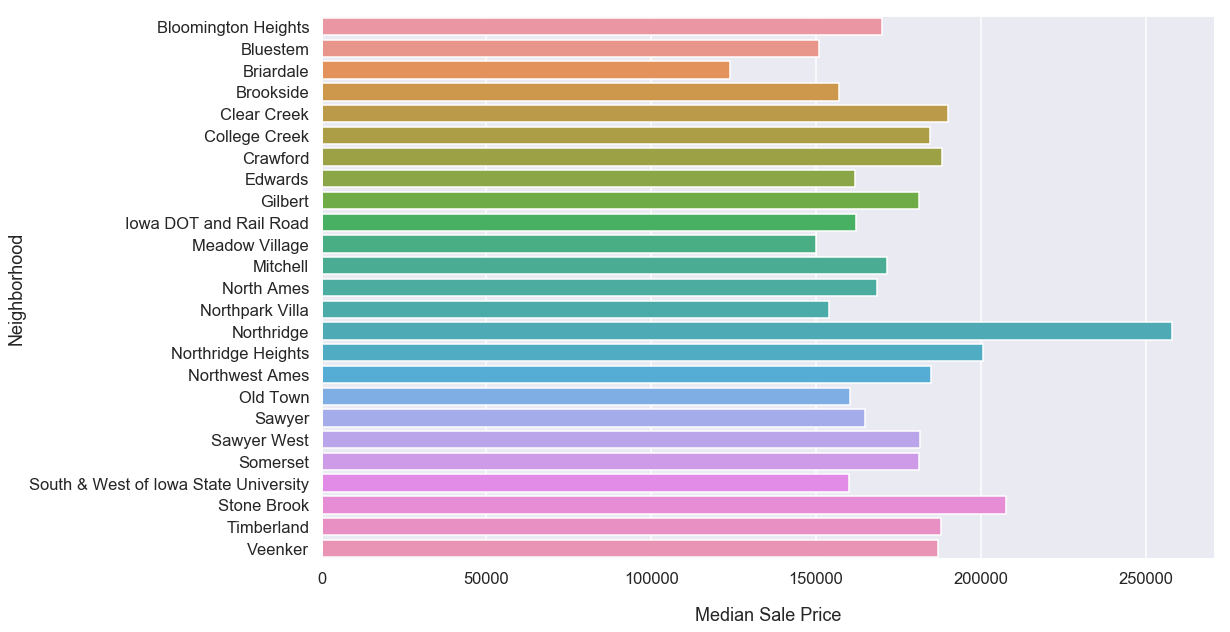

In [23]:
neighbourhood_median_price = housing_ts.groupby('Neighborhood').SalePrice.median()

plt.figure(figsize=(16,10))
sns.barplot(y=neighbourhood_median_price.index, x=neighbourhood_median_price)
plt.xlabel("Median Sale Price", labelpad=20)

- Northridge area seems to be the pricey part of town, with Stone Brook, Timberland, Somerset, and Veenker following up
- Briardale is clearly a cheaper part of the city, but also a much smaller neighborhood in terms of volumes of properties.

Moving onto the number of houses built in each area over time:

In [24]:
housing_ts.YearBuilt = housing_ts.YearBuilt.apply(lambda x: datetime.datetime.strptime(str(x), '%Y'))

In [25]:
housing_built_ts = housing_ts.set_index(pd.DatetimeIndex(housing_ts.YearBuilt))
housing_built_ts.reindex()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DateSold,HouseAge
YearBuilt,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500.0000,2008-02-01,5
1976-01-01,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500.0000,2007-05-01,31
2001-01-01,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500.0000,2008-09-01,7
1915-01-01,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0000,2006-02-01,91
2000-01-01,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000.0000,2008-12-01,8
1993-01-01,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,Shed,700,10,2009,WD,Normal,143000.0000,2009-10-01,16
2004-01-01,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,307000.0000,2007-08-01,3
1973-01-01,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,Shed,350,11,2009,WD,Normal,200000.0000,2009-11-01,36
1931-01-01,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2008,WD,Abnorml,129900.0000,2008-04-01,77


In [26]:
palette = ["#a14a77",
"#62bf4b",
"#9f56c7",
"#a1b837",
"#5e6ed9",
"#c0ab39",
"#d055b6",
"#4dc381",
"#dd4b85",
"#508f36",
"#c98fd2",
"#dc9636",
"#5e99d5",
"#ca5e2b",
"#43c4c4",
"#d43e41",
"#5bae8a",
"#a74949",
"#33784a",
"#745fa2",
"#a7b26b",
"#e28085",
"#697329",
"#da9669",
"#91692d"]

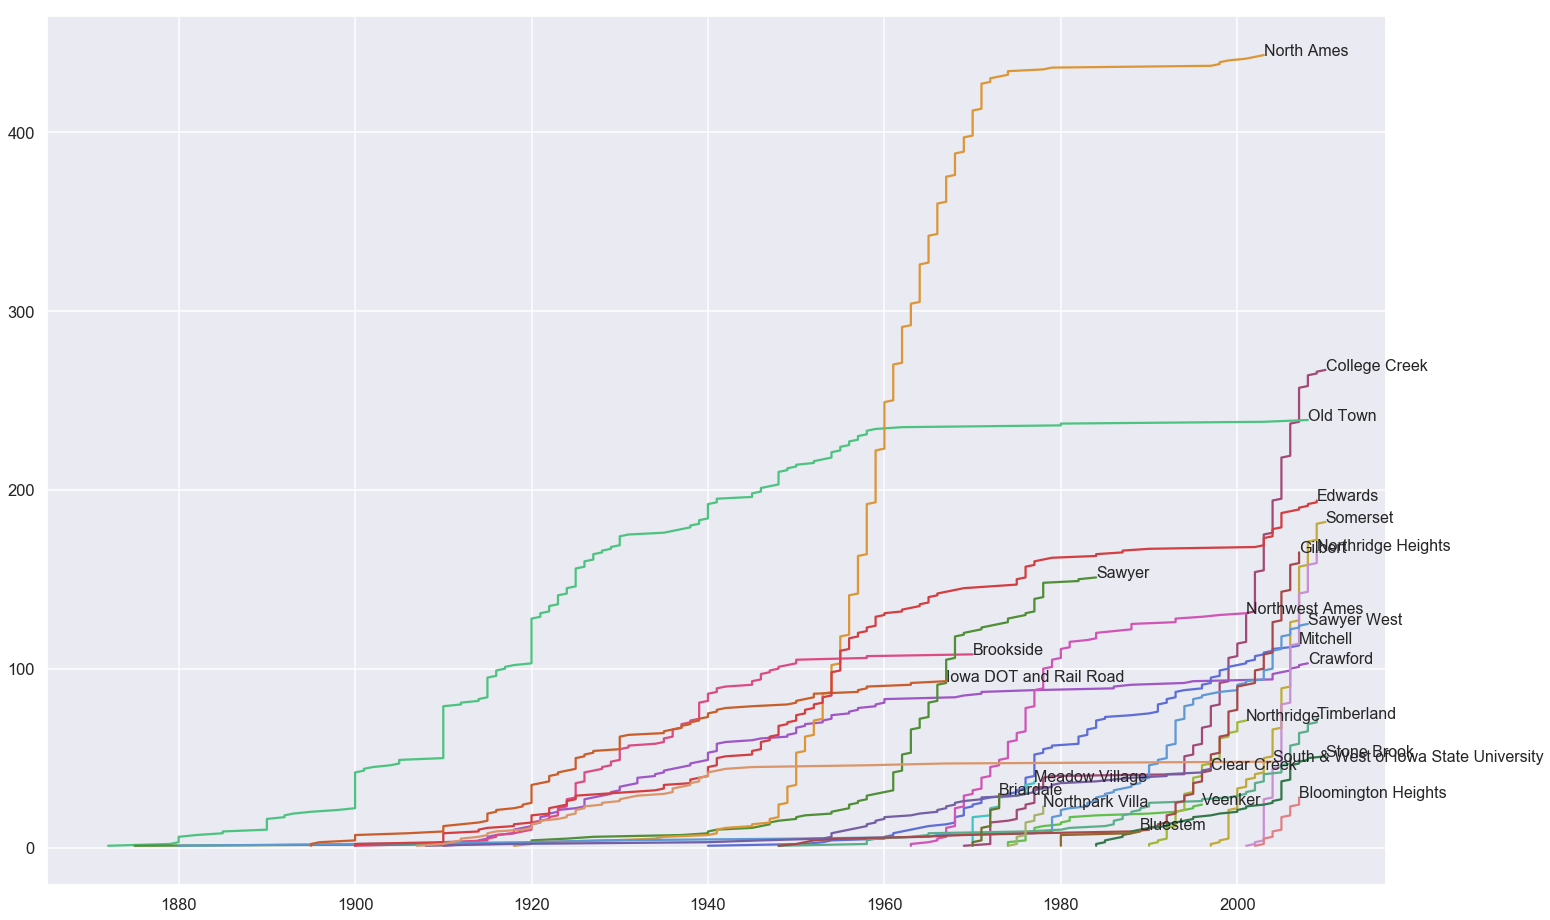

In [27]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(24, 16))

for neighbourhood, color in zip(housing_built_ts.Neighborhood.unique(), palette):
    neighbourhood_data = housing_built_ts[housing_built_ts.Neighborhood == neighbourhood]
    neighbourhood_data['Count'] = 1
    houses_cumsum = neighbourhood_data.sort_index().Count.cumsum()
    plt.plot(houses_cumsum.index, houses_cumsum.values, label=neighbourhood, c=color)
    plt.annotate(neighbourhood, (houses_cumsum.index[-1], houses_cumsum.values[-1]), fontsize=16)

#plt.legend()
    

In [28]:
neighbourhoods = housing_ts.pivot_table(index='Neighborhood', values=['SalePrice'])

In [29]:
neighbourhoods['Size'] = neighbourhood_size

In [30]:
neighbourhoods

,SalePrice,Size
Neighborhood,,
Bloomington Heights,179745.053661,28
Bluestem,147818.180850,10
Briardale,131115.774587,30
Brookside,145220.512939,108
Clear Creek,201841.549157,44
College Creek,190383.778313,267
Crawford,197075.993040,103
Edwards,153536.157231,194
Gilbert,188999.065887,165


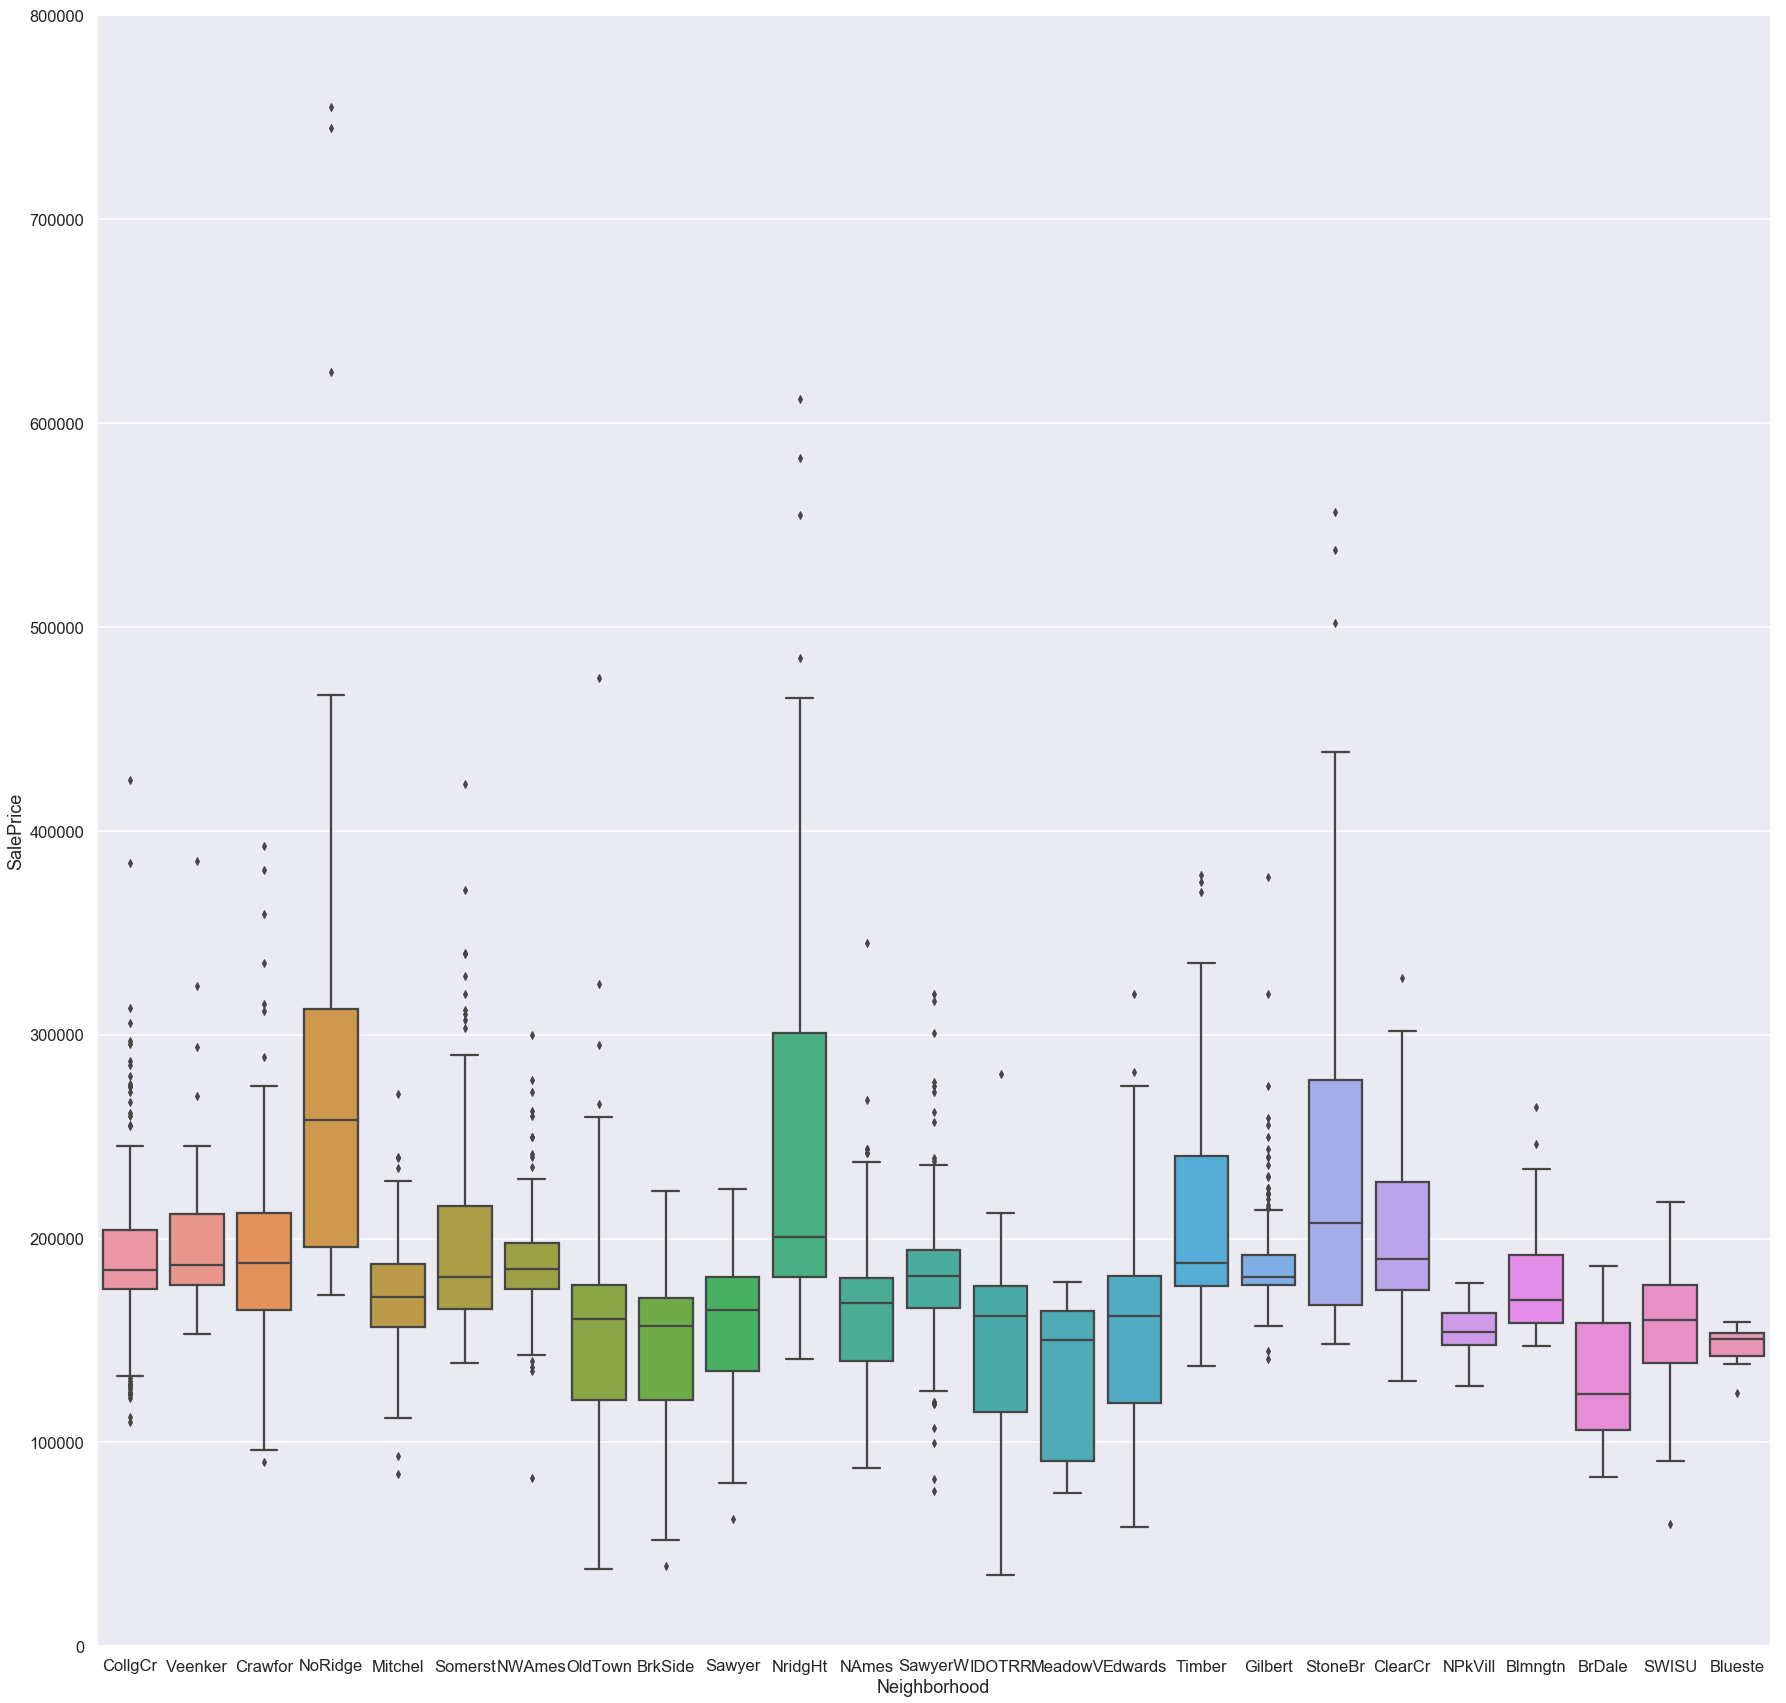

In [31]:
f, ax = plt.subplots(figsize=(30, 30))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=housing)
fig.axis(ymin=0, ymax=800000);

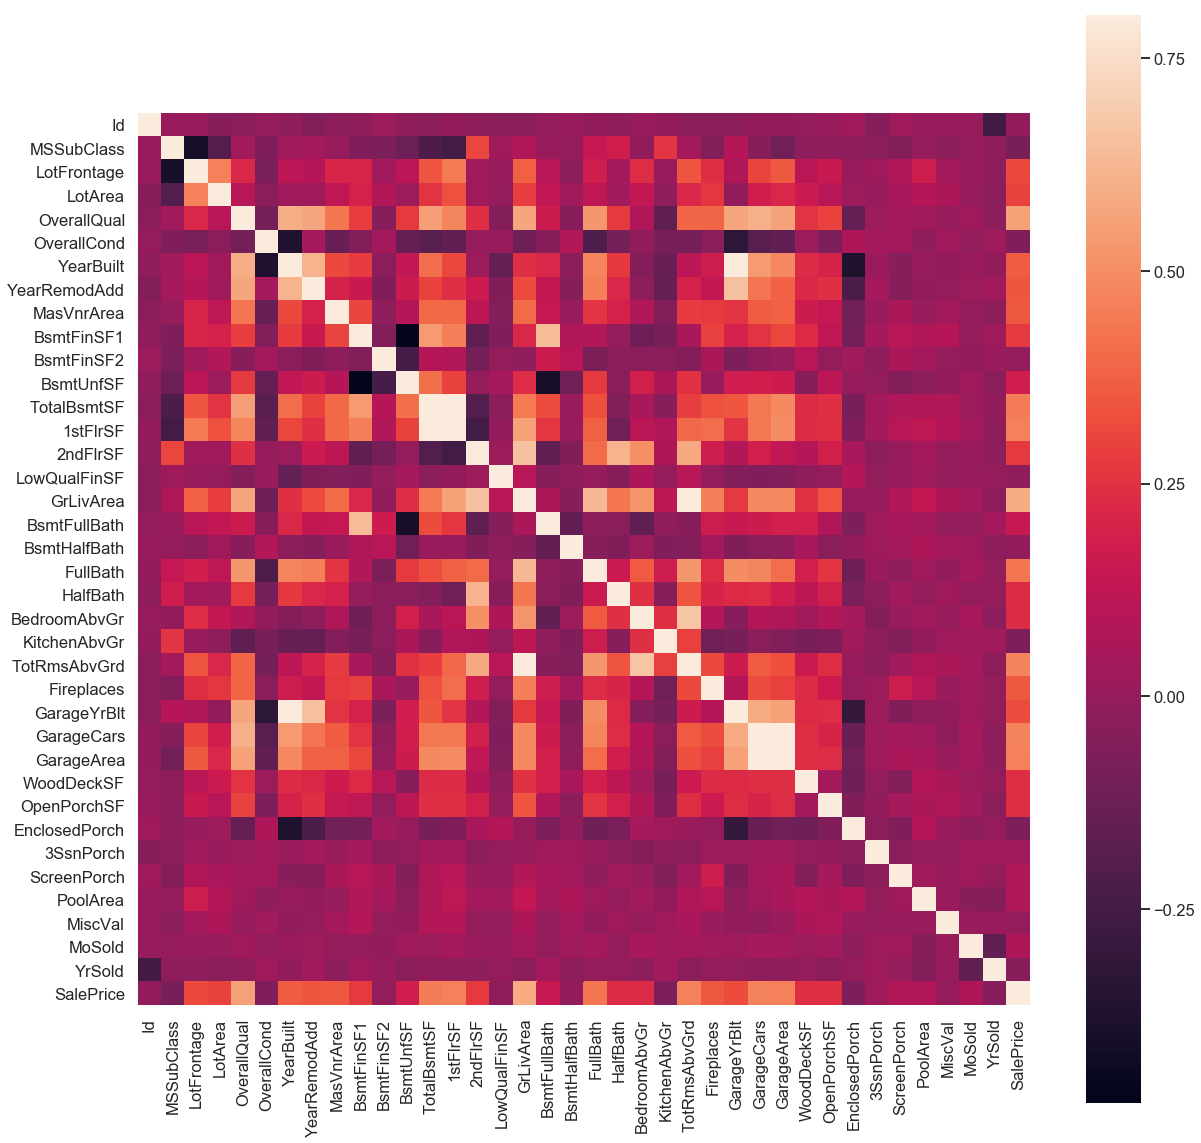

In [32]:
#correlation matrix
corrmat = housing.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8,square=True)

From the correlation heatmap we can see some signs of multi-collinearity between 'TotalBsmtSF','1stFlrSF' and '2ndFlrSF' and between the 'GarageX' variables. They show significant correlation between them. It comes to show that the variables are giving us the exact same information.

Next lets look at the 10 largest variables that are correlated with SalePrice

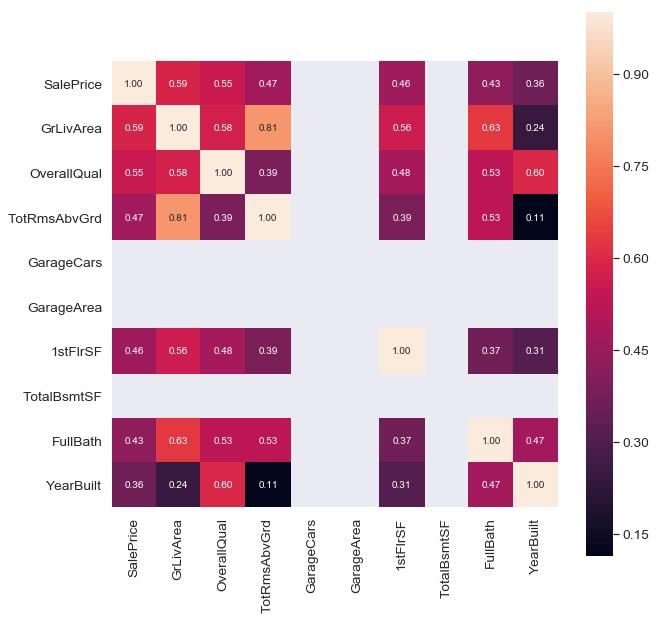

In [33]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)



Now looking at this correalation heat map we can straight away see the most correlated variables with SalePrice. A few things to note like mentioned above are that 'TotalBsmtSF' and '1stFlrSF' are highly correlated with each other. Other factors that are highly correlated with each other include 'GarageCars', 'GarageArea', 'GrLivArea' and 'TotRmsAbvGrd'. This indicates multi-collinearity in our independenst variables. We can drop the factors that are least related to our target SalePrice. 

1) OverallQual

2) GrLivArea

3) GarageCars

4) TotalBsmtSF

5) FullBath 

6) YearBuilt

# OLS regression

In [34]:
cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','Neighborhood','SalePrice']
housing_reg_data = housing[cols]

In [35]:
housing_reg_data.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,Neighborhood,SalePrice
0,7,1710,2.0,856.0,2,2003,CollgCr,208500.0
1,6,1262,2.0,1262.0,2,1976,Veenker,181500.0
2,7,1786,2.0,920.0,2,2001,CollgCr,223500.0
3,7,1717,3.0,756.0,1,1915,Crawfor,140000.0
4,8,2198,3.0,1145.0,2,2000,NoRidge,250000.0


In [36]:
ols_regression = sm.ols(formula = 'SalePrice ~ OverallQual+GrLivArea+GarageCars+TotalBsmtSF+FullBath+YearBuilt+Neighborhood',data=housing_reg_data).fit()
print(ols_regression.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     81.04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:54:51   Log-Likelihood:                -35211.
No. Observations:                2917   AIC:                         7.048e+04
Df Residuals:                    2886   BIC:                         7.067e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4

ValueError: x and y must be the same size

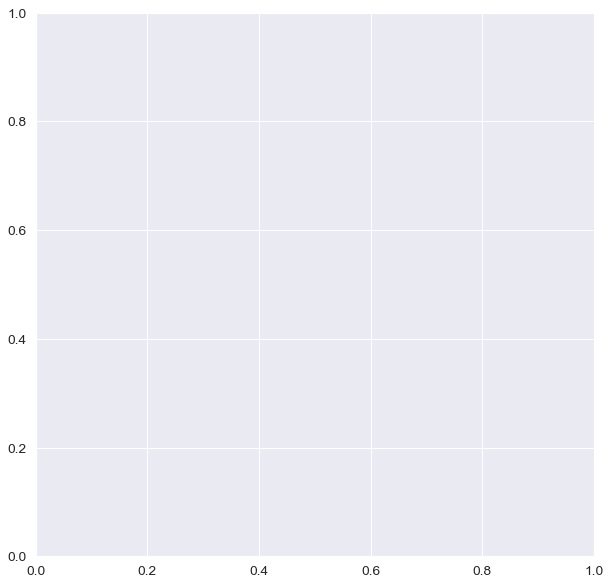

In [37]:

predicted_prices = ols_regression.fittedvalues

plt.subplots(figsize=(10, 10))
plt.scatter(predicted_prices, housing_reg_data.SalePrice)

plt.xlabel("Predicted Prices by Model")
plt.ylabel("Housing Price")
plt.title("Predictions vs. Original Prices")

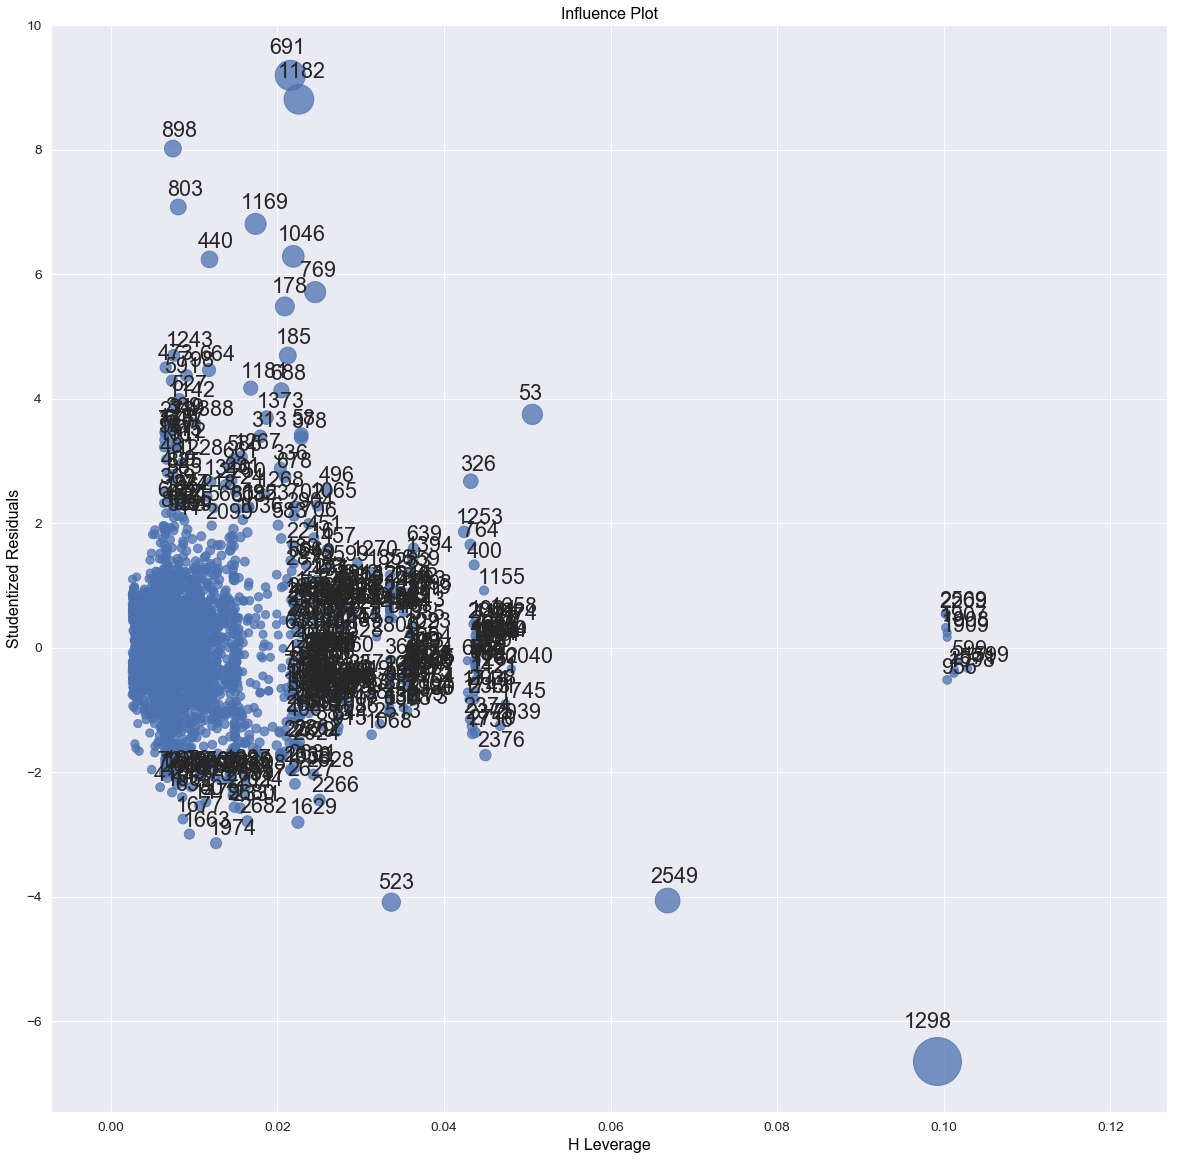

In [38]:
fig, ax = plt.subplots(figsize=(20,20))
fig = sm2.graphics.influence_plot(ols_regression, ax=ax, criterion="cooks")

In [39]:
housing_reg_data['Fitted_Values']=ols_regression.fittedvalues

Looking at the influence points in the graph above we can see some obvious outliers which can be removed and then the OLS can be run again to see the effects.

# Removing outliers

In [40]:
housing_reg_data2 = housing_reg_data.drop([691,
                                          1182,898,803,1169,1046,769,440,178,185,496,583,304,1178,1349,523,1298,632,
                                          1324,599,956])
ols_regression_new = sm.ols(formula = 'SalePrice ~ OverallQual+GrLivArea+GarageCars+TotalBsmtSF+FullBath+YearBuilt+Neighborhood',
                            data=housing_reg_data2).fit()

print(ols_regression_new.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     80.17
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:55:23   Log-Likelihood:                -34648.
No. Observations:                2896   AIC:                         6.936e+04
Df Residuals:                    2865   BIC:                         6.954e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

After removing the outliers the model seems to have improved sugnificantly from an R-squared of ~.80 to ~.85